In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('kellys_icecream_dataset.csv')
df.head(10)

,customer_id,transaction_id,amount
0,1001,339473,89
1,1002,359433,5
2,1003,43176,52
3,1004,27169,19
4,1001,530588,4
5,1004,528902,78
6,1005,584167,72
7,1003,55479,45
8,1005,500607,98
9,1004,544617,65


In [4]:
print(df.shape)
display(df.columns)
df.dtypes

(100, 3)


Index(['customer_id', 'transaction_id', 'amount'], dtype='object')

customer_id       int64
transaction_id    int64
amount            int64
dtype: object

In [5]:
df.isnull().sum()

customer_id       0
transaction_id    0
amount            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['amount'].describe()

count    100.000000
mean      54.850000
std       27.635205
min        4.000000
25%       39.000000
50%       52.000000
75%       78.000000
max       98.000000
Name: amount, dtype: float64

Part 2 – EDA (Exploratory Data Analysis)

In [8]:
df.groupby(['customer_id'])['amount'].count()

customer_id
1001    22
1002    17
1003    15
1004    20
1005    26
Name: amount, dtype: int64

In [9]:
df_sort = df.sort_values(['customer_id','transaction_id'])
third_txn = df_sort.groupby('customer_id').nth(2).reset_index()
third_txn

,index,customer_id,transaction_id,amount
0,10,1001,374711,94
1,15,1002,415562,50
2,20,1003,102487,39
3,5,1004,528902,78
4,8,1005,500607,98


In [10]:
df['discount'] = (100 - df['amount']) / 100
df['is_33_percent_discount'] = df['discount'] <= 0.33
df.head()

,customer_id,transaction_id,amount,discount,is_33_percent_discount
0,1001,339473,89,0.11,True
1,1002,359433,5,0.95,False
2,1003,43176,52,0.48,False
3,1004,27169,19,0.81,False
4,1001,530588,4,0.96,False


In [11]:
df[df['is_33_percent_discount']].head()

,customer_id,transaction_id,amount,discount,is_33_percent_discount
0,1001,339473,89,0.11,True
5,1004,528902,78,0.22,True
6,1005,584167,72,0.28,True
8,1005,500607,98,0.02,True
10,1001,374711,94,0.06,True


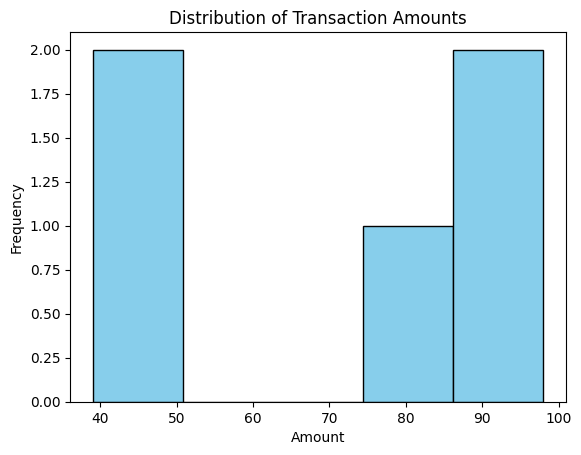

In [12]:
plt.hist(third_txn['amount'], bins=5,color='skyblue',edgecolor='black')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

In [13]:
discounted_df = df[df['is_33_percent_discount']]
third_txn_33 = discounted_df.groupby('customer_id').nth(2).reset_index()
display(third_txn_33)

,index,customer_id,transaction_id,amount,discount,is_33_percent_discount
0,16,1005,272319,78,0.22,True
1,17,1001,445346,92,0.08,True
2,37,1004,900015,78,0.22,True


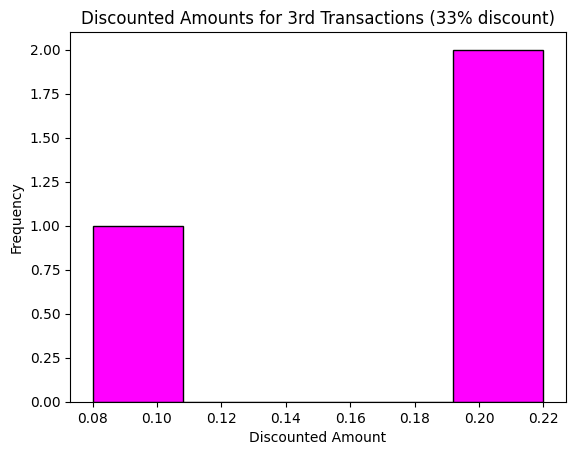

In [14]:
plt.hist(third_txn_33['discount'], bins=5, color='magenta', edgecolor='black')
plt.title("Discounted Amounts for 3rd Transactions (33% discount)")
plt.xlabel("Discounted Amount")
plt.ylabel("Frequency")
plt.show()

Part 3 – Statistics

In [15]:
df['amount'].mean()

np.float64(54.85)

In [16]:
third_txn_33['discount'].mean()

np.float64(0.17333333333333334)

In [17]:
total_transactions = len(df)
num_third_33 = len(third_txn_33)
prob = num_third_33 / total_transactions
print(f"Probability that is a discounted 3rd purchase: {prob:.2f}")

Probability that is a discounted 3rd purchase: 0.03


Part 4 – Linear Algebra & NumPy

In [18]:
amt_array=df_sort['amount'].to_numpy()
amt_array

array([19, 89, 94, 92,  4,  4, 94, 94, 89, 92, 19, 89, 94, 89, 89, 19, 92,
       92, 89,  4, 92, 19, 42,  5, 50, 30, 30, 50, 30, 30, 50,  5, 42,  5,
       50, 30,  5, 50,  5, 52, 45, 39, 39, 52, 39, 52, 45, 45, 52, 45, 45,
       39, 39, 45, 19, 91, 78, 65, 55, 78, 19, 78, 55, 19, 91, 19, 55, 78,
       55, 55, 91, 65, 19, 65, 78, 43, 98, 58, 72, 78, 72, 58, 43, 78, 43,
       43, 78, 72, 98, 78, 98, 78, 43, 43, 78, 78, 43, 43, 58, 43])

In [19]:
third_txn_idx = df_sort.groupby('customer_id').nth(2).index
discount_vector = np.zeros(len(df))
discount_vector[third_txn_idx] = 0.33
print(discount_vector)

[0.   0.   0.   0.   0.   0.33 0.   0.   0.33 0.   0.33 0.   0.   0.
 0.   0.33 0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [20]:
df['discount_amt'] = df['amount'] * (discount_vector)
display(df)

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt
0,1001,339473,89,0.11,True,0.0
1,1002,359433,5,0.95,False,0.0
2,1003,43176,52,0.48,False,0.0
3,1004,27169,19,0.81,False,0.0
4,1001,530588,4,0.96,False,0.0
...,...,...,...,...,...,...
95,1001,900073,19,0.81,False,0.0
96,1005,900074,58,0.42,False,0.0
97,1004,900075,65,0.35,False,0.0
98,1005,900076,43,0.57,False,0.0


In [21]:
df[df['discount_amt']!=0.0]

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt
5,1004,528902,78,0.22,True,25.74
8,1005,500607,98,0.02,True,32.34
10,1001,374711,94,0.06,True,31.02
15,1002,415562,50,0.50,False,16.50
20,1003,102487,39,0.61,False,12.87


In [22]:
total_discount = np.dot(df['amount'], discount_vector)
print("Total discount given across all customers:", total_discount)

Total discount given across all customers: 118.47


In [23]:
weight_vector = np.where(discount_vector == 0, 0.67, 0.33)
print(weight_vector)
weighted_sum = np.dot(df['amount'], weight_vector)
print("Weighted sum:", weighted_sum)

[0.67 0.67 0.67 0.67 0.67 0.33 0.67 0.67 0.33 0.67 0.33 0.67 0.67 0.67
 0.67 0.33 0.67 0.67 0.67 0.67 0.33 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67]
Weighted sum: 3552.8900000000003


Part 5 – Calculus

In [24]:
import sympy as sp
Amount, DiscountRate = sp.symbols('Amount DiscountRate')
Discounted_Amount = Amount * (1 - DiscountRate)
derivative = sp.diff(Discounted_Amount, Amount)
derivative

1 - DiscountRate

Part 6 – Feature Engineering

In [25]:
df['Transaction_Rank'] = df.groupby('customer_id').cumcount() + 1
display(df)

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank
0,1001,339473,89,0.11,True,0.0,1
1,1002,359433,5,0.95,False,0.0,1
2,1003,43176,52,0.48,False,0.0,1
3,1004,27169,19,0.81,False,0.0,1
4,1001,530588,4,0.96,False,0.0,2
...,...,...,...,...,...,...,...
95,1001,900073,19,0.81,False,0.0,22
96,1005,900074,58,0.42,False,0.0,25
97,1004,900075,65,0.35,False,0.0,20
98,1005,900076,43,0.57,False,0.0,26


In [26]:
df[df['Transaction_Rank'] == 3]

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank
9,1004,544617,65,0.35,False,0.00,3
10,1001,374711,94,0.06,True,31.02,3
12,1005,412764,43,0.57,False,0.00,3
15,1002,415562,50,0.50,False,16.50,3
20,1003,102487,39,0.61,False,12.87,3


In [27]:
df['Discount_Applied'] = (df['Transaction_Rank'] == 3).astype(int)
df.head()

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank,Discount_Applied
0,1001,339473,89,0.11,True,0.0,1,0
1,1002,359433,5,0.95,False,0.0,1,0
2,1003,43176,52,0.48,False,0.0,1,0
3,1004,27169,19,0.81,False,0.0,1,0
4,1001,530588,4,0.96,False,0.0,2,0


In [28]:
df['Discounted_Amount'] = df['amount'] * 0.33 * df['Discount_Applied']
display(df)

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank,Discount_Applied,Discounted_Amount
0,1001,339473,89,0.11,True,0.0,1,0,0.0
1,1002,359433,5,0.95,False,0.0,1,0,0.0
2,1003,43176,52,0.48,False,0.0,1,0,0.0
3,1004,27169,19,0.81,False,0.0,1,0,0.0
4,1001,530588,4,0.96,False,0.0,2,0,0.0
...,...,...,...,...,...,...,...,...,...
95,1001,900073,19,0.81,False,0.0,22,0,0.0
96,1005,900074,58,0.42,False,0.0,25,0,0.0
97,1004,900075,65,0.35,False,0.0,20,0,0.0
98,1005,900076,43,0.57,False,0.0,26,0,0.0


In [29]:
df['Savings']=df['amount']-df['Discounted_Amount']
display(df)

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
0,1001,339473,89,0.11,True,0.0,1,0,0.0,89.0
1,1002,359433,5,0.95,False,0.0,1,0,0.0,5.0
2,1003,43176,52,0.48,False,0.0,1,0,0.0,52.0
3,1004,27169,19,0.81,False,0.0,1,0,0.0,19.0
4,1001,530588,4,0.96,False,0.0,2,0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
95,1001,900073,19,0.81,False,0.0,22,0,0.0,19.0
96,1005,900074,58,0.42,False,0.0,25,0,0.0,58.0
97,1004,900075,65,0.35,False,0.0,20,0,0.0,65.0
98,1005,900076,43,0.57,False,0.0,26,0,0.0,43.0


Part 7 – SQL Simulation in Pandas

In [30]:
discounted_rows = df[df['Discount_Applied'] == 1]
discounted_rows.head()

,customer_id,transaction_id,amount,discount,is_33_percent_discount,discount_amt,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
9,1004,544617,65,0.35,False,0.00,3,1,21.45,43.55
10,1001,374711,94,0.06,True,31.02,3,1,31.02,62.98
12,1005,412764,43,0.57,False,0.00,3,1,14.19,28.81
15,1002,415562,50,0.50,False,16.50,3,1,16.50,33.50
20,1003,102487,39,0.61,False,12.87,3,1,12.87,26.13


Part 8 – Insights

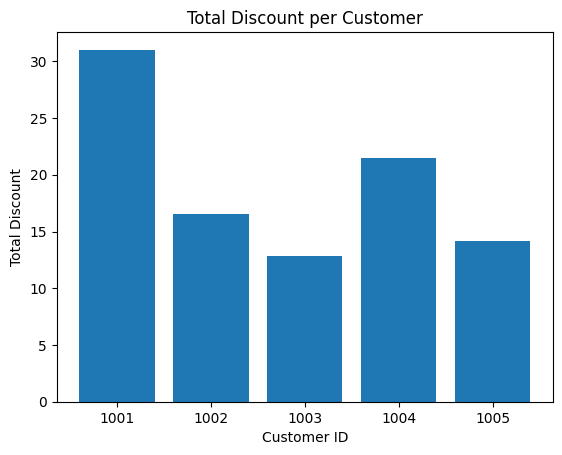

In [31]:
total_dis_customer = df.groupby('customer_id')['Discounted_Amount'].sum()
plt.bar(total_dis_customer.index, total_dis_customer.values)
plt.title("Total Discount per Customer")
plt.xlabel("Customer ID")
plt.ylabel("Total Discount")
plt.show()

In [32]:
total_discount = df['Discounted_Amount'].sum()
print("Total discount across all customers:", total_discount)

Total discount across all customers: 96.03


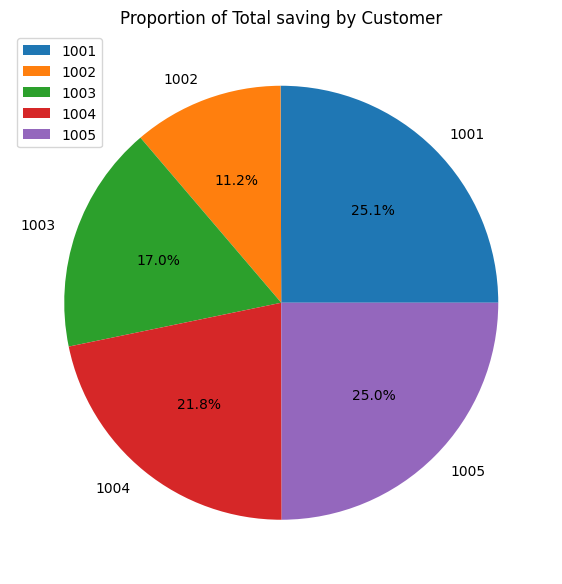

In [33]:
total_savings_per_customer = df.groupby('customer_id')['Savings'].mean()
plt.figure(figsize=(7,8))
plt.pie(total_savings_per_customer.values,labels=total_savings_per_customer.index, autopct='%1.1f%%')
plt.title("Proportion of Total saving by Customer")
plt.legend()
plt.show()

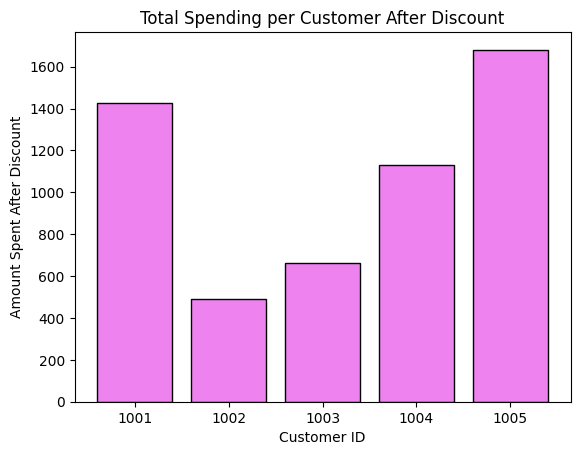

In [34]:
total_spent_per_customer = df.groupby('customer_id')['Savings'].sum().sort_values(ascending=False)
plt.bar(total_spent_per_customer.index, total_spent_per_customer.values, color='violet',edgecolor='black')
plt.title("Total Spending per Customer After Discount")
plt.xlabel("Customer ID")
plt.ylabel("Amount Spent After Discount")
plt.show()